# **Map SalishSea**

In [8]:
%matplotlib inline
import numpy as np
import xarray as xr
import os
import sys
from matplotlib import pyplot as plt, animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from cartopy import crs, feature
from datetime import datetime, timedelta
import cmocean
sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

cmap = cmocean.cm.deep

## Paths

In [9]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)

## Simulation

In [10]:
def make_prefix(date, path, res='h'):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1h_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix
path_NEMO = make_prefix(datetime(2018, 12, 1), paths['NEMO'])


In [11]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

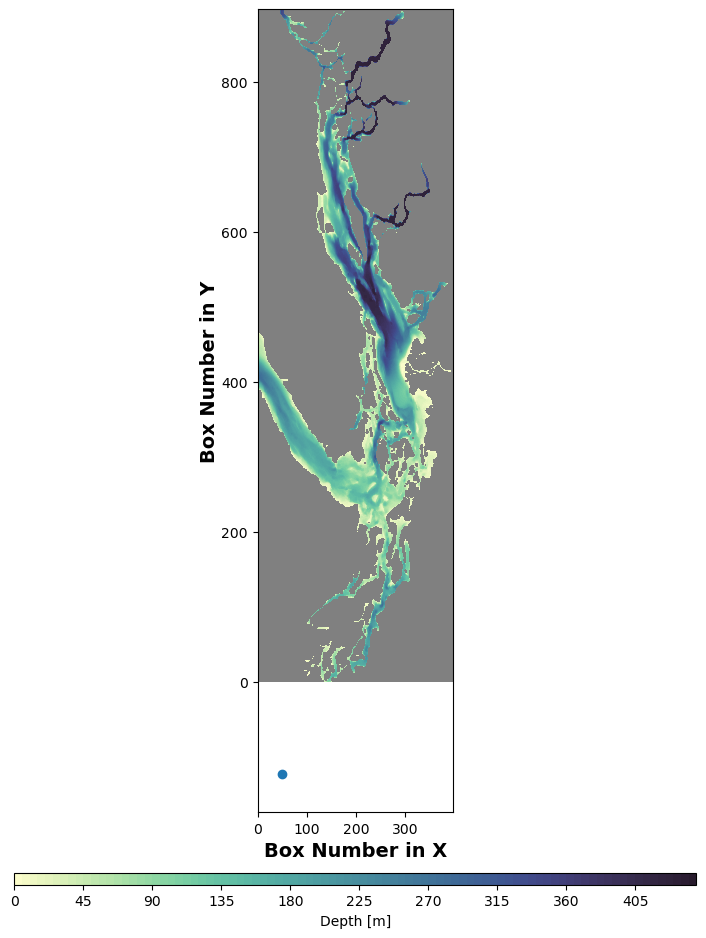

In [13]:
# Make map
blevels = list(np.arange(0,450,5))
fig, ax = plt.subplots(figsize=(8.8, 13.2))
x = np.arange(0,398)
y = np.arange(0,898)
X,Y = np.meshgrid(x,y)
#ax.add_feature(feature.GSHHSFeature('high', facecolor='#DDDDDD',edgecolor='#DDDDDD'),zorder=2)
#ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(X, Y, mask.totaldepth[:,:],zorder=1,cmap=cmap,levels=blevels)
ax.contourf(X, Y, mask.umask[0,0,:,:],zorder=2,cmap='gray',levels=[-1,0])
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.scatter(-123.39602820000964,48.417427482627495)


cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=1,pad=0.06)

cbar.set_label('Depth [m]')
ax.text(-0.20, 0.55, 'Box Number in Y', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.06, 'Box Number in X', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")

f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)


#plt.savefig("/Users/jvalenti/Desktop/domain.pdf")